# Imports and setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]

In [2]:
import os
from darwinian_shift import DarwinianShift, EvenMutationalSpectrum, UniprotLookup
from darwinian_shift import plot_domain_structure, get_bins_for_uniprot_features, hide_top_and_right_axes

In [3]:
plot_directory="./whole_notch_figures/"
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [4]:
# Colours 
egf_colour = '#88CCEE'
egf_11_12_colour = '#0077BB'
LNR_colour = '#EE7733'
ANK_colour = '#009988'
transmembrane_colour = '#CC3311'
non_domain_colour = '#BBBBBB'

In [5]:
data = pd.read_excel("aau3879_TableS2.xlsx", skiprows=17, sheet_name='Mutations_collapsed_by_distance')

In [6]:
d = DarwinianShift(
    data=data, 
    source_genome='grch37',
    
    # Not using a spectrum for any tests here, so can save time by using one that doesn't need calculating 
    spectra=EvenMutationalSpectrum(),  
    
    # Just want the missense mutations.
    included_mutation_types='missense'
)

In [7]:
# Use uniprot data to define domain boundaries
u = UniprotLookup(uniprot_directory=".",
                 transcript_uniprot_mapping={'ENST00000277541': 'P46531'}  # Must manually define the correct mapping for NOTCH1
                 )

# NOTCH1

In [8]:
s = d.make_section_from_gene_name(gene='NOTCH1')
s.load_section_mutations()

In [9]:
last_residue = s.null_mutations['residue'].max()

In [10]:
NOTCH1_uniprot = u.get_uniprot_data('ENST00000277541')

In [11]:
bins, types, descriptions = get_bins_for_uniprot_features(NOTCH1_uniprot, min_gap=1, last_residue=last_residue)

In [12]:
colours = []
for t, desc in zip(types, descriptions):
    if desc in ['EGF-like 11; calcium-binding', 'EGF-like 12; calcium-binding']:
        colours.append(egf_11_12_colour)
    elif t == 'domain':
        colours.append(egf_colour)
    elif t == 'repeat':
        if 'LNR' in desc:
            colours.append(LNR_colour)
        elif 'ANK' in desc:
            colours.append(ANK_colour)
    elif t == 'transmembrane region':
        colours.append(transmembrane_colour)
    elif t is None and desc is None:
        colours.append(non_domain_colour)

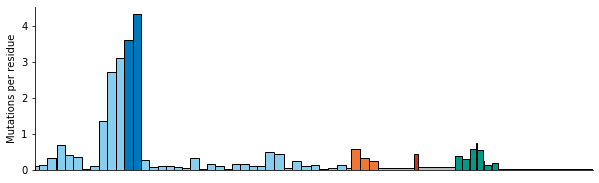

In [13]:
# Without a bit of padding of the domains, we have some odd results. Maybe that is ok.
s.plot_bar_observations(figsize=(10, 3), binning_regions=bins, 
             normalise_by_region_size=True, facecolour=colours, linewidth=1)
plt.xlim([0, last_residue])
hide_top_and_right_axes(plt.gca())
plt.xticks([])
plt.xlabel('')
plt.savefig(os.path.join(plot_directory, 'notch1_domain_missense_mutation_counts.pdf'), transparent=True)

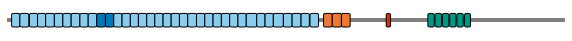

In [14]:
domain_colours = []
for c in colours:
    if c == non_domain_colour:
        domain_colours.append(None)
    else:
        domain_colours.append(c)
plot_domain_structure(bins, domain_colours, 
                      height=100, figsize=(10, 0.5))
plt.xlim([0, last_residue]);
plt.savefig(os.path.join(plot_directory, 'notch1_domain_plot.pdf'), transparent=True)

# NOTCH2

In [15]:
NOTCH2_uniprot = u.get_uniprot_data('ENST00000256646')

In [16]:
bins, types, descriptions = get_bins_for_uniprot_features(NOTCH2_uniprot, min_gap=1, last_residue=last_residue)

In [17]:
colours = []
for t, desc in zip(types, descriptions):
    if desc in ['EGF-like 11; calcium-binding', 'EGF-like 12; calcium-binding']:
        colours.append(egf_11_12_colour)
    elif t == 'domain':
        colours.append(egf_colour)
    elif t == 'repeat':
        if 'LNR' in desc:
            colours.append(LNR_colour)
        elif 'ANK' in desc:
            colours.append(ANK_colour)
    elif t == 'transmembrane region':
        colours.append(transmembrane_colour)
    elif t is None and desc is None:
        colours.append(non_domain_colour)

In [18]:
s2 = d.make_section_from_gene_name(gene='NOTCH2')
s2.load_section_mutations()

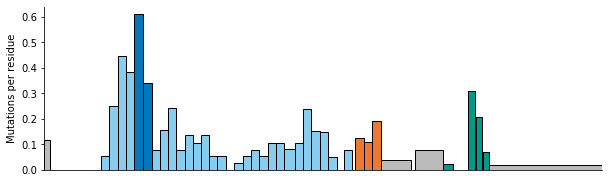

In [19]:
s2.plot_bar_observations(figsize=(10, 3), binning_regions=bins, 
             normalise_by_region_size=True, facecolour=colours, linewidth=1)
plt.xlim([0, last_residue])
hide_top_and_right_axes(plt.gca())
plt.xticks([])
plt.xlabel('')
plt.savefig(os.path.join(plot_directory, 'notch2_domain_missense_mutation_counts.pdf'), transparent=True)

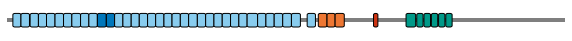

In [20]:
domain_colours = []
for c in colours:
    if c == non_domain_colour:
        domain_colours.append(None)
    else:
        domain_colours.append(c)
plot_domain_structure(bins, domain_colours, 
                      height=100, figsize=(10, 0.5))
plt.xlim([0, last_residue]);
plt.savefig(os.path.join(plot_directory, 'notch2_domain_plot.pdf'), transparent=True)